In [8]:
import os
import numpy as np
import cv2
import requests
from bs4 import BeautifulSoup

In [7]:
HEADERS = {
    "User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'
}

# Scrape Images

In [58]:
import requests
from bs4 import BeautifulSoup
import os 

url = "https://archive.vogue.com/issue/20211101"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')


images = soup.find('img', class_='bndwgt__issuecover_main')

print(images)

<img alt="Issue: - NOVEMBER 2021 | Vogue" class="bndwgt__issuecover_main" src="https://vogueprod.blob.core.windows.net/vogueoutput20211101thumbnails/Covers/0x600/20211101.jpg"/>


# Save images

In [59]:
import datetime 
from PIL import Image 
from io import BytesIO

# Define the base URL of the website 
# "https://vogueprod.blob.core.windows.net/vogueoutput20231201thumbnails/Covers/0x600/20231201.jpg" 
base_url = "https://vogueprod.blob.core.windows.net/vogueoutput{date}thumbnails/Covers/0x600/{date}.jpg" 

# Define the starting and end years we want to use 
start_year = 2000
end_year = 2023

# create a directory to save the changes 
output_directory = "all_pics/scraped/vogue"
os.makedirs(output_directory, exist_ok=True)

# Loop over every year 
for year in range (start_year, end_year+1):
    for month in range(1,13):
        # create a datetime object for the first day of the month 
        first_day_of_month = datetime.date(year, month,1)
        
        # format the date as YYMM01
        formatted_date = first_day_of_month.strftime("%Y%m01") #strftime converts as datetime object into string
        
        # construct the image URL 
        image_url = base_url.format(date=formatted_date)
        
        # get the image data
        response = requests.get(image_url)
        if response.status_code == 200:
            # open the image using PIL 
            image = Image.open(BytesIO(response.content))
            
            # Define the file path to save the image 
            file_path = os.path.join(output_directory, f"vogue{formatted_date}.jpg")
            
            # Save the image as JPG file 
            image.save(file_path)
            
            # Close the image 
            image.close()
            
            # print a message that the images have been saved 
            print(f"Saved:vogue{formatted_date}")
            
            # print an error message
        else:
            print(f"Error in saving: vogue{formatted_date}: {response.status_code}")

Saved:vogue20000101
Saved:vogue20000201
Saved:vogue20000301
Saved:vogue20000401
Saved:vogue20000501
Saved:vogue20000601
Saved:vogue20000701
Saved:vogue20000801
Saved:vogue20000901
Saved:vogue20001001
Saved:vogue20001101
Saved:vogue20001201
Saved:vogue20010101
Saved:vogue20010201
Saved:vogue20010301
Saved:vogue20010401
Saved:vogue20010501
Saved:vogue20010601
Saved:vogue20010701
Saved:vogue20010801
Saved:vogue20010901
Saved:vogue20011001
Saved:vogue20011101
Saved:vogue20011201
Saved:vogue20020101
Saved:vogue20020201
Saved:vogue20020301
Saved:vogue20020401
Saved:vogue20020501
Saved:vogue20020601
Saved:vogue20020701
Saved:vogue20020801
Saved:vogue20020901
Saved:vogue20021001
Saved:vogue20021101
Saved:vogue20021201
Saved:vogue20030101
Saved:vogue20030201
Saved:vogue20030301
Saved:vogue20030401
Saved:vogue20030501
Saved:vogue20030601
Saved:vogue20030701
Saved:vogue20030801
Saved:vogue20030901
Saved:vogue20031001
Saved:vogue20031101
Saved:vogue20031201
Saved:vogue20040101
Saved:vogue20040201


# Detect Faces from images

In [48]:
def detect_faces(image, cascade_path="haarcascade_frontalface_default.xml"):
    face_cascade = cv2.CascadeClassifier(cascade_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
            grayscale_image,
            scaleFactor=1.1,
            minNeighbors=5)
    return faces

def get_faces_in_image(image_path, company, image_number):
    image = cv2.imread(image_path)
    print(image_path)
    faces = detect_faces(image)
    face_number = 0
    for (x, y, width, height) in faces:
        cropped = image[y:y + height, x:x + width]
        # Finding the year of the image 
        year = int(image_path.split('/')[-1][5:9]) #first 4 characters after the company name is the year
        file_name = "all_pics/cropped_faces/{0}/{1}{2:08d}_{3}_{4}.jpg".format(company, company, image_number, face_number, year)
        cv2.imwrite(file_name, cropped)
        face_number += 1
    
    # were there any faces found?
    return (face_number != 0)
    
def get_all_faces(company):
    directory = "all_pics/scraped/{}".format(company)
    output_directory = "all_pics/cropped_faces/{}".format(company)
    os.makedirs(output_directory, exist_ok=True)  # Added error handling for directory creation
    image_number = 0
    for image in os.listdir(directory):
        image_path = "{}/{}".format(directory, image)
        found_faces = get_faces_in_image(image_path, company, image_number)
        if (found_faces):
            image_number += 1
    return image_number



In [49]:
faces = get_all_faces("vogue")
print("Found {} faces in Vogue covers".format(faces))

all_pics/scraped/vogue/vogue20080201.jpg
all_pics/scraped/vogue/vogue20000401.jpg
all_pics/scraped/vogue/vogue20180201.jpg
all_pics/scraped/vogue/vogue20100401.jpg
all_pics/scraped/vogue/vogue20030501.jpg
all_pics/scraped/vogue/vogue20130501.jpg
all_pics/scraped/vogue/vogue20060901.jpg
all_pics/scraped/vogue/vogue20160901.jpg
all_pics/scraped/vogue/vogue20050801.jpg
all_pics/scraped/vogue/vogue20150801.jpg
all_pics/scraped/vogue/vogue20120101.jpg
all_pics/scraped/vogue/vogue20020101.jpg
all_pics/scraped/vogue/vogue20190601.jpg
all_pics/scraped/vogue/vogue20090601.jpg
all_pics/scraped/vogue/vogue20061001.jpg
all_pics/scraped/vogue/vogue20161001.jpg
all_pics/scraped/vogue/vogue20051101.jpg
all_pics/scraped/vogue/vogue20151101.jpg
all_pics/scraped/vogue/vogue20201201.jpg
all_pics/scraped/vogue/vogue20061201.jpg
all_pics/scraped/vogue/vogue20161201.jpg
all_pics/scraped/vogue/vogue20231101.jpg
all_pics/scraped/vogue/vogue20201001.jpg
all_pics/scraped/vogue/vogue20110201.jpg
all_pics/scraped

all_pics/scraped/vogue/vogue20050701.jpg
all_pics/scraped/vogue/vogue20160601.jpg
all_pics/scraped/vogue/vogue20060601.jpg
all_pics/scraped/vogue/vogue20230501.jpg
all_pics/scraped/vogue/vogue20200401.jpg
all_pics/scraped/vogue/vogue20091001.jpg
all_pics/scraped/vogue/vogue20191001.jpg
all_pics/scraped/vogue/vogue20070201.jpg
all_pics/scraped/vogue/vogue20170201.jpg
all_pics/scraped/vogue/vogue20040301.jpg
all_pics/scraped/vogue/vogue20140301.jpg
all_pics/scraped/vogue/vogue20220101.jpg
all_pics/scraped/vogue/vogue20090901.jpg
all_pics/scraped/vogue/vogue20190901.jpg
all_pics/scraped/vogue/vogue20101201.jpg
all_pics/scraped/vogue/vogue20001201.jpg
all_pics/scraped/vogue/vogue20160101.jpg
all_pics/scraped/vogue/vogue20060101.jpg
all_pics/scraped/vogue/vogue20230201.jpg
all_pics/scraped/vogue/vogue20200301.jpg
all_pics/scraped/vogue/vogue20011101.jpg
all_pics/scraped/vogue/vogue20111101.jpg
all_pics/scraped/vogue/vogue20021001.jpg
all_pics/scraped/vogue/vogue20121001.jpg
all_pics/scraped

In [88]:
def rename(company):
    # Define the directories
    input_directory = "all_pics/cropped_faces/{}".format(company)
    output_directory = "all_pics/cropped_faces_renamed1/{}".format(company)

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    count = 0
    for image in os.listdir(input_directory):
        # Define the file paths
        input_image_path = os.path.join(input_directory, image)
        
        # Skip non-image files
        if not image.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            print("Skipping non-image file:", input_image_path)
            continue
            
        # Extract the year from the filename
        year = int(image.split('_')[-1].split('.')[0])  # Assuming the year is the last part before the extension

        # Define the output file path
        output_image_path = os.path.join(output_directory, "{}{:08d}_{}.jpg".format(company, count, year))

        # Read the image
        image_data = cv2.imread(input_image_path)
        
        # Check if the image data is valid
        if image_data is not None:
            # Write the image to the output directory with the new name
            cv2.imwrite(output_image_path, image_data)
            count += 1
        else:
            print("Error: Unable to read image:", input_image_path)

In [89]:
rename("vogue")

Skipping non-image file: all_pics/cropped_faces/vogue/.DS_Store
Skipping non-image file: all_pics/cropped_faces/vogue/.ipynb_checkpoints


In [90]:
def take_average(image):
    average_row_color = np.average(image, axis=0)
    average_color = np.average(average_row_color, axis=0)
    color_block = np.zeros((100, 100, 3), dtype=np.uint8)
    color_block[:, :] = average_color
    return color_block  

def get_average_colors(company):
    directory = "all_pics/cropped_faces_renamed1/{}".format(company)
    for image in os.listdir(directory):
        image_path = "{}/{}".format(directory, image)
        face = cv2.imread(image_path)
        average_color = take_average(face)
        file_name = "all_pics/average_color/{}/{}".format(company, image)
        cv2.imwrite(file_name, average_color)

In [91]:
get_average_colors("vogue")

# Identify skin and calculate skin color (one image)

In [92]:
from sklearn.cluster import KMeans
from collections import Counter

def cluster_face(image, white_threshold):
    
    # save a patch of pixels from the center of the pic to identify the skin label
    (height, width, three) = image.shape
    (center_x, center_y) = (width // 2, height // 2)
    patch = image[center_x - 10 : center_x + 10, center_y - 10 : center_y + 10]
    flattened_patch = patch.transpose(2, 0, 1). reshape(3, -1).transpose()
    
    # remove white pixels, and fit a classifier
    flattened = image.transpose(2, 0, 1).reshape(3, -1).transpose()
    filtered = np.array([pixel for pixel in flattened if pixel.sum() < white_threshold])
    k_means = KMeans(n_clusters=2)
    k_means.fit(filtered)
    
    # identify the skin label
    patch_labels = k_means.predict(flattened_patch)
    skin_label = Counter(patch_labels).most_common()[0][0]
    
    # save the average skin pixel
    all_labels = k_means.predict(filtered)
    skin_mask = (all_labels == skin_label)
    skin_pixels = filtered[skin_mask]
    average_color = np.average(skin_pixels, axis=0)
    return average_color

In [93]:
# EXAMPLE

# Load the image using OpenCV
image_path = "all_pics/cropped_faces_renamed1/vogue/vogue00000286_2003.jpg"  # Replace this with the path to your image file
image = cv2.imread(image_path)

# Set the white threshold (you may need to adjust this value)
white_threshold = 1000

# Call the cluster_face function
average_color = cluster_face(image, white_threshold)

print("Average skin color:", average_color)

Average skin color: [128.8758376  152.16436736 184.89101301]


/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Identify skin and calculate skin color for all images

In [94]:
import csv       
             
def all_cluster_face(folder_path, company_name, white_threshold, output_csv):
    skin_colors = []
    for image_file in os.listdir(folder_path):
        if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                average_color = cluster_face(image, white_threshold)
                # Extract year from the filename
                # Extract year from the filename
                year = int(image_file.split('_')[-1].split('.')[0])  # Adjusted to split at the correct underscore
                skin_colors.append((image_file, company_name, year, *average_color))
            else:
                print("Error loading image:", image_path)
    
    # Save skin color values to a CSV file
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Company Name', 'Year', 'Blue', 'Green', 'Red'])
        writer.writerows(skin_colors)

In [95]:
# Example usage:
folder_path = "all_pics/cropped_faces_renamed1/vogue"
company_name = 'vogue'
white_threshold = 1000
output_csv = "skintones.csv"
all_cluster_face(folder_path, company_name, white_threshold, output_csv)

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

In [96]:
import pandas as pd
import colorsys

In [105]:
color_values = pd.read_csv("skintones.csv")
color_values.rename(columns={'Image Name': 'Image', 'Company Name': 'Company', 'Year': 'Year', 'Blue': 'b', 'Green': 'g', 'Red': 'r'}, inplace=True)
color_values.head()

,Image,Company,Year,b,g,r
0,vogue00000025_2018.jpg,vogue,2018,192.223005,201.932114,233.721320
1,vogue00000056_2013.jpg,vogue,2013,80.808983,112.155972,188.481984
2,vogue00000279_2013.jpg,vogue,2013,148.150114,176.798692,223.119713
3,vogue00000264_2016.jpg,vogue,2016,162.216192,181.588587,226.258635
4,vogue00000116_2013.jpg,vogue,2013,156.140646,187.711738,232.597027


In [106]:
# display int types 
display(color_values.dtypes)

# change floats to int
color_values['b'] = color_values['b'].astype(int)
color_values['g'] = color_values['g'].astype(int)
color_values['r'] = color_values['r'].astype(int)

display(color_values.dtypes)
color_values.head()

Image       object
Company     object
Year         int64
b          float64
g          float64
r          float64
dtype: object

Image      object
Company    object
Year        int64
b           int64
g           int64
r           int64
dtype: object

,Image,Company,Year,b,g,r
0,vogue00000025_2018.jpg,vogue,2018,192,201,233
1,vogue00000056_2013.jpg,vogue,2013,80,112,188
2,vogue00000279_2013.jpg,vogue,2013,148,176,223
3,vogue00000264_2016.jpg,vogue,2016,162,181,226
4,vogue00000116_2013.jpg,vogue,2013,156,187,232


# Use H, S, L values to determine skin tone

In [107]:
h_col = []
l_col = []
s_col = []

for index, row in color_values.iterrows():
    r = row["r"] / 255
    g = row["g"] / 255
    b = row["b"] / 255
    (h, l, s) = colorsys.rgb_to_hls(r, g, b)
    h_col.append(h)
    l_col.append(l)
    s_col.append(s)
    
color_values["h"] = h_col
color_values["l"] = l_col
color_values["s"] = s_col

color_values = color_values.sort_values(by=["l"])
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
247,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000248_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
136,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
272,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
285,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


In [108]:
color_values.tail(5) 

,Image,Company,Year,b,g,r,h,l,s
270,vogue00000146_2012.jpg,vogue,2012,188,201,226,0.057018,0.811765,0.395833
11,vogue00000087_2007.jpg,vogue,2007,184,205,233,0.071429,0.817647,0.526882
220,vogue00000165_2004.jpg,vogue,2004,185,204,233,0.065972,0.819608,0.521739
0,vogue00000025_2018.jpg,vogue,2018,192,201,233,0.036585,0.833333,0.482353
251,vogue00000197_2000.jpg,vogue,2000,206,210,227,0.031746,0.849020,0.272727


In [109]:
color_values.groupby('l')
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
247,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000248_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
136,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
272,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
285,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


In [110]:
# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

color_values.groupby(pd.cut(color_values['l'], bins=bins))
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
247,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000248_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
136,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
272,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
285,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


In [111]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

# Visualizations

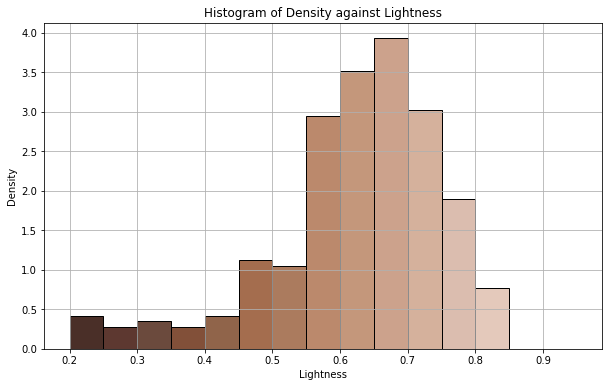

In [112]:
# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

# Group by lightness and calculate average BGR values
average_bgr = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].mean()

# Calculate the density of data points in each bin
lightness_counts, _ = np.histogram(color_values['l'], bins=bins)
bin_widths = bins[1:] - bins[:-1]
density = lightness_counts / np.sum(lightness_counts * bin_widths)

# Plot histogram for density against lightness
plt.figure(figsize=(10, 6))
for i, (index, row) in enumerate(average_bgr.iterrows()):
    rgb_color = row.values[::-1] / 255.0  # Reverse BGR to RGB and normalize to [0, 1]
    rgb_color = np.nan_to_num(rgb_color) 
    hex_color = rgb2hex(rgb_color)  # Convert RGB to hex color
    plt.bar(index.mid, density[i], width=index.length, color=hex_color, edgecolor='black')

plt.xlabel('Lightness')
plt.ylabel('Density')
plt.title('Histogram of Density against Lightness')
plt.grid(True)
plt.show()

## Skin Tones Throughout the Years

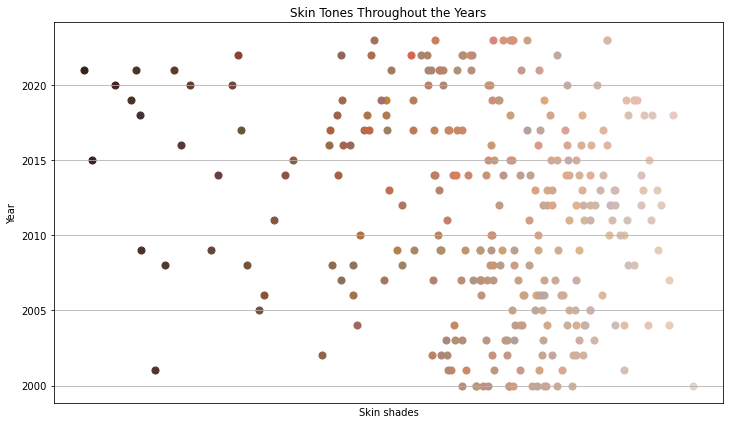

In [126]:
plt.figure(figsize=(12, 7))
for index, row in color_values.iterrows():
    avg_skin_tone = (row['r'] + row['g'] + row['b']) / 3  # Calculate average skin tone
    plt.scatter(avg_skin_tone, row['Year'], color=(row['r']/255, row['g']/255, row['b']/255), label='Skin Color', s=50)

# Customize plot
plt.xlabel('Skin shades')
plt.ylabel('Year')
plt.title('Skin Tones Throughout the Years')
plt.grid(True)
plt.xticks([]) #remove x axis labels
plt.show()

### Observations
From the graph, we can observe that the distribution of skin tones widens and becomes more uniformly distributed over time. This implies a growing diversity and inclusion of women, particularly in the representation of women of color.

Between 2000 and 2005, there isn’t a lot of variance in how light the cover models appear. Only three of the eighty-one cover models were black, and all of these women had lighter skin (Marion Jones, Halle Berry, and Liya Kebede.

There is a bit more spread after 2005. Certainly, part of this is due to the race of the models that appeared on the Vogue covers but part can also be attributed to the changes in photography styles, lighting and beauty trends.

<b> Photography Styles and lighting </b>

Lighting, staging, and post-photographic processing play a role in creating the skin tone that we actually see on the magazine’s cover. Ultimately, the same woman can end up looking quite different depending on who’s shooting and editing her.

The best example of this is Rihanna. Across her five Vogue covers, her skin tone lightness spanned 40% of the lightness range that we found among cover models.

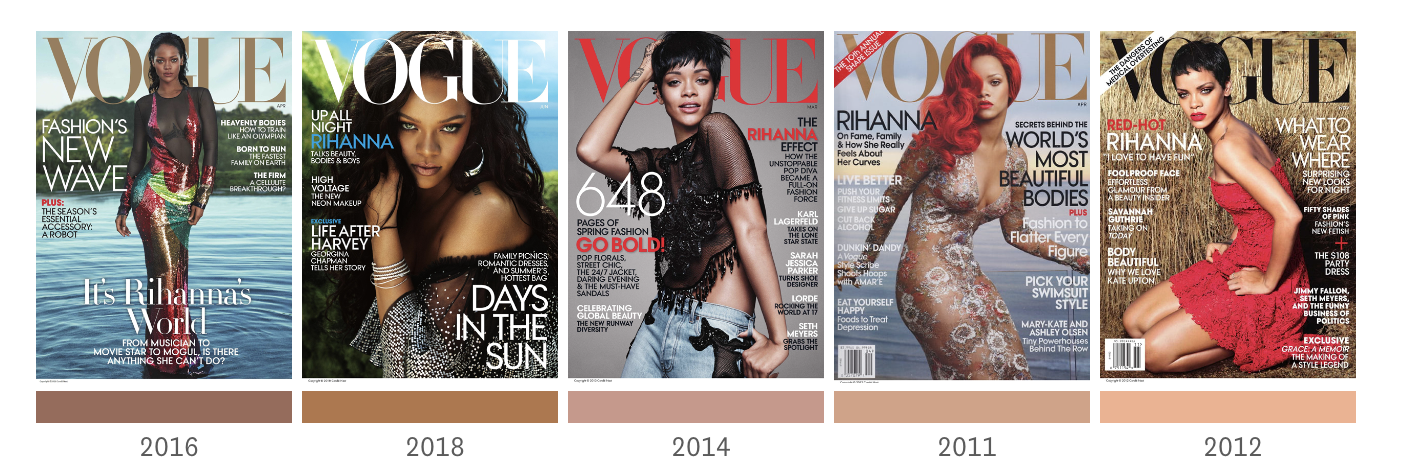


<b> Beauty Trends and Cultural Appropriation </b>

With the success of the late 2000s reality show, Keeping up with the Kardashians, the Kardashians have made their way into mainstream culture and significantly influenced beauty standards. An article from allure.com states "During the Kardashian reign, a new term was coined to describe the suddenly rampant phenomenon of racial performance on social media: blackfishing. Stemming from the racist practice of blackface, blackfishing specifically describes when people use tools like makeup, Photoshop, and cosmetic surgery that make them appear more Black."

/var/folders/tl/pjvv24r97gb_70lb57b6jp680000gn/T/ipykernel_2182/1924195903.py:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting


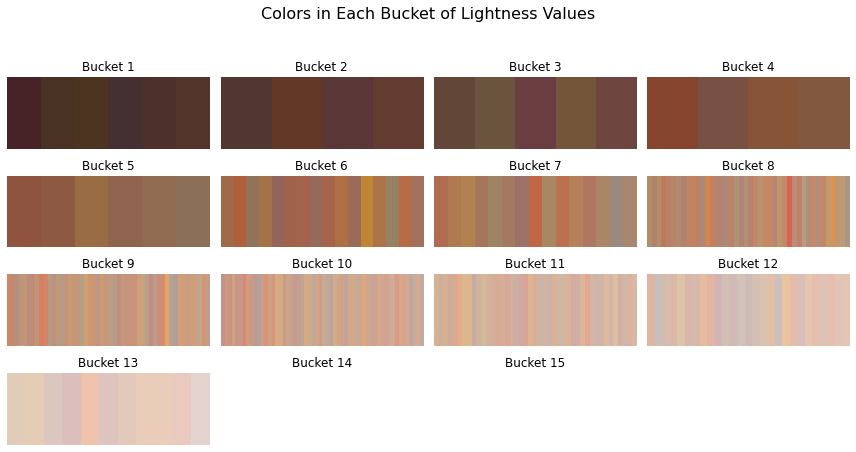

In [127]:
# Group by lightness and get the colors in each bucket
colors_by_bucket = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].apply(lambda x: x.values.tolist())

plt.figure(figsize=(12, 8))
for i, (index, colors) in enumerate(colors_by_bucket.iteritems(), start=1):
    plt.subplot(5, 4, i)
    hex_colors = [rgb2hex([color / 255.0 for color in color[::-1]]) for color in colors]  # Reverse BGR to RGB and convert to hex
    plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting
    plt.axis('off')
    plt.title(f'Bucket {i}')

plt.suptitle('Colors in Each Bucket of Lightness Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Resources

https://stackoverflow.com/questions/12182891/plot-image-color-histogram-using-matplotlib?rq=3

https://pudding.cool/2019/04/vogue/

https://www.youtube.com/watch?v=44C_oJiseTQ

https://archive.vogue.com/

https://www.allure.com/story/the-kardashian-effect